# Logistic Regression
(Tevfik Aytekin)

Logistic regression is a classification method (do not get confused with the word "regression" in its name) where the aim is to separate the data instances into two groups.

As an example dataset we will use the well known iris dataset.

In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=names)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In order to make this a binary classification problem we will drop 'Iris-virginica' instances.


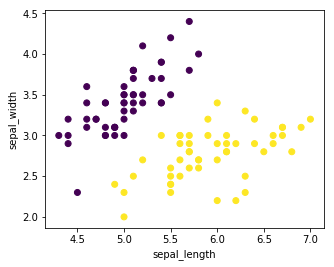

In [2]:
iris.drop(iris[iris.species =='Iris-virginica'].index, inplace=True)

le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor'])
colors = le.transform(iris.species.values)

x=0;y=1;
# change x and y values to see scatter plots of different features

plt.figure(figsize=(5, 4))
plt.scatter(iris.iloc[:, x], iris.iloc[:, y],c=colors)
#plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(names[x]);
plt.ylabel(names[y]);


 


The aim of classification is to find a decision boundary which will seperate the two classes of flowers.

### Intiution behind logistic regression

Many textbooks gives a probabilistic interpretation of logistic regression cost function, however if you are not experienced in probabilistic thinking it could be difficult to understand what is going on. So, here I would like use a more intuitive approach. Remember, our aim is to predict the class label of an instance given its features and we are using a linear model (that is a model which assumes a linear relationship between the features and class labels) of the following form:

$$
w_0+w_1*sepal\_width+w_2*sepal\_length
$$

Any assignment of values to the weights $w_i$ defines a linear line. We can illustrate this as follows:

w [[ 0.8]
 [-2. ]
 [ 1. ]]
w [[ 1.3 ]
 [-2.  ]
 [ 1.01]]


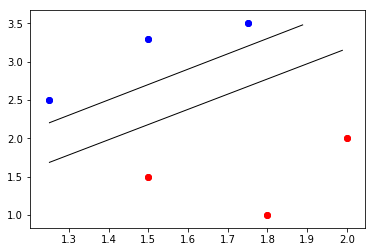

In [40]:
clf = 1
X = np.array([[1.25,2.5],[1.5,3.3],[1.75,3.5],[1.5,1.5],[2,2],[1.8,1]])
y =np.array([0,0,0,1,1,1])

w =  np.array([0.8,-2,1]).reshape(3,1)
plot_decision_boundary(clf, X, y,w)
w =  np.array([1.3,-2,1.01]).reshape(3,1)
plot_decision_boundary(clf, X, y,w)


The above graph shows three example lines and the critical question is this: what is the best line to use to seperate these two classes of points. There are two key properties of this best line:

- It should seperate these points according to their classes into two halves as much as possible (Note that sometimes it might not be possible to find a straight line which will seperate all the points perfectly according to their class values). Even if it is possible to find such a perfect seperating line, there could be many such lines. Which one should we choose? This leads us to the second property.
- In the example above, the line which is somewhat in the middle of the blue and red lines seems to be better then the other one which is very close to the blue points. How can we make this idea prices. One possibility is to use a step function and use mean squared error in the cost function as follows:$$
h_w(x) = step(w_0+w_1*sepal\_width+w_2*sepal\_length)
$$

where
$$
step(x) = 0 \: if \: x < 0 \: and \: 1 \: if\:  x \geq 0
$$

As an example, if we assume that the parameter values are: 10, 4, and -5 then we get the following hypothesis:

$$
h_w(x) = step(10+4*sepal\_width-5*sepal\_length)
$$

In this case, an instance whose $sepal\_width=2.8 \:and \:sepal\_length=6.1$ will be classified as follows:

$$
h_w(x) = step(10+4*2.8-5*6.1) = step(-9.3) = 0
$$

Once you decide on the model, the next step is to write the cost function and solve it. Similar to linear regression we can use a cost function as follows:

$$
J(w)=\sum_{i=1}^m(y^{(i)}-h_{w}(x^{(i)}))^2
$$

There are certain problems with the classification model we discussed up to now:

- There is no unique solution, i.e., there can be multiple $h_w(x)$ which have exactly the same cost.
- The cost function is not easy to differentiate so it is not easy to find the maximal/minimal value of the function.
- The value of the cost function is the same for all positive and negative examples which is not realistic.

Another possibility is to use the convinient logistic (or sigmoid) function. Below is the formula for the logistic function and how it looks like:
$$\sigma(x) = \frac{1}{1+e^{-x}}$$


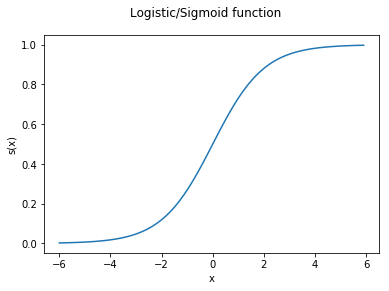

In [44]:
x = np.arange(-6, 6, 0.1)
s = 1 / (1 + np.exp(-x))
plt.plot(x, s)
plt.xlabel('x')
plt.ylabel('s(x)')
plt.suptitle("Logistic/Sigmoid function")
plt.show()

### Logistic Regression from Scratch

Now, instead of the step function we will use the logictic function to make our hypothesis:
$$
h_w(x) = \sigma(w_0+w_1*sepal\_width+w_2*sepal\_length)
$$

There could be different cost functions that we can write, the one which has probabilistic assumptions is this:

$$
J(w) = (h_w(x))^y(1 - h_w(x))^{(1-y)}
$$

But we can understand it without using probability. When $y==1$ the right hand side has no effect and we have a larger value of $J(w)$ as $h_w(x)$ gets larger. Note the shape of the logistic curve, it first increases rapidly by then the increase slows down. 

The total cost of the dataset can be written as:

$$
J(W) = \prod_{i=1}^n(h_w(x^{(i)}))^{y^{(i)}}(1-h_w(x^{(i)}))^{1-y^{(i)}}
$$

Since it is easier to minimize/maximize the log of this formula we will try to maximize the following formula:

$$
logJ(W) = \frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(h(x^{(i)}))+(1-y^{(i)})\log(1-h(x^{(i)}))
$$



Let us find the derivative of the cost function for a single training example $(x, y)$.

$\frac{\partial J}{\partial w_j} = \left(y\frac{1}{h(x)}-(1-y)\frac{1}{1-h(x)}\right)\frac{\partial h(x)}{\partial w_j}$

$=\left(y\frac{1}{h(x)}-(1-y)\frac{1}{1-h(x)}\right)h(x)(1-h(x))\frac{\partial w^T x}{\partial w_j}$

$= (y(1-h(x))-(1-y)(h(x))x_j$

$=(y-h(x))x_j$

for $m$ examples the derivative is

$= -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-h(x^{(i)}))x^{(i)}_j$ which can also be written in matrix notation as

$\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$ where

X: is a n (# of features) by m (# examples) data matrix.

A: is $\sigma(w^T X)$ where $w$ is a n by 1 weight vector.

Y: is a 1 by m vector of actual values.

If you do a similar derivation, then

$\frac{\partial J}{\partial b} = \frac{1}{m}(A - Y)$

In [ ]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))    
    return s

### Decision Boundary Plotting Function

In [18]:
def plot_decision_boundary(clf, X, y, w = None):
    plot_step = 0.02
    plot_colors = "rgb"
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    if w is None:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]
        print("clf")
        #print(Z.shape)
    else:
        print("w",w)
        Z = np.dot(np.c_[np.ones(xx.ravel().size),xx.ravel(), yy.ravel()],w)
        #Z = np.where(Z > 0.5, 1, 0)
        
        #print(Z)
        #print(np.c_[xx.ravel(), yy.ravel()].shape)

    Z = Z.reshape(xx.shape)
    
    #print(Z.shape)

    
    plt.contour(xx, yy, Z, [0.5], linewidths=1, colors='black');
 
    #cs = plt.contourf(xx, yy, Z, cmap="BuGn")
    #plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, cmap='winter',edgecolor='black');
    #plt.axis('equal')

### Using logistic regression from sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor'])
y = le.transform(iris.species.values)

X = iris.iloc[:,0:2].values


clf = LogisticRegression().fit(X,y)
plot_decision_boundary(clf, X, y)
plt.title("Logistic Regression")

print(clf.coef_)
print(clf.intercept_)

## Logistic Regression from Scratch

In [ ]:
n_features = 2
learning_rate = 1
n_iter = 100
m = X.shape[1]
w = np.random.rand(n_features).reshape(n_features,1)
b = np.random.rand()
for i in range(n_iter):
    A = sigmoid(np.dot(w.T, X.T) + b)  # no need to transpose
    
    J = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    print(J)
    dw = (1 / m) * np.dot(X, (A - Y).T) # no need to transpose
    db = (1 / m) * np.sum(A - Y)
    
    w = w - learning_rate * dw  # need to broadcast
    b = b - learning_rate * db

print(w,b)




In [ ]:
def cost(X,y,w,b):
    sum  = 0;
    for i in range(X.shape[0]):
        sum += y[i]*np.log(sigmoid(np.dot(X[i],w) + b))+(1-y[i])*np.log(sigmoid(1-np.dot(X[i],w) + b))
    return sum

### Logistic Regression Version I
Stochastic Gradient Descent

In [ ]:
import copy
from sklearn.utils import shuffle
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor'])
y = le.transform(iris.species.values)
X = iris.iloc[:,0:2].values

n_features = 2
learning_rate = 0.003
n_iter=1000
m = X.shape[0]
w = np.random.rand(n_features,1)
b = np.random.rand()
for iter in range(n_iter):
    X,y = shuffle(X,y)
    if(iter % 100 == 0):
        print(cost(X,y,w,b))
    
    for i in range(m):
        #np.dot(sigmoid(np.dot(X*w) - y).T,X).T/m; 
        w_back = copy.deepcopy(w)       
        for j in range(n_features): 
            dw=(y[i] - sigmoid(np.dot(X[i].reshape([1,2]),w_back) + b))*X[i,j]
            w[j] = w_back[j] + learning_rate * dw;
        
    for i in range(m):
        db=(y[i] - sigmoid(np.dot(X[i].reshape([1,2]),w_back) + b))
        b = b + learning_rate * db;
    
    

print(w)
print(b)

In [ ]:
import copy
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor'])
y = le.transform(iris.species.values)
X = iris.iloc[:,0:2].values

n_features = 2
learning_rate = 0.1
n_iter=1000
m = X.shape[0]
w = np.random.rand(n_features,1)
b = np.random.rand()

for iter in range(n_iter):
    if(iter % 100 == 0):
        print(cost(X,y,w,b))
    w_back = copy.deepcopy(w)
    for j in range(n_features): 
        dw = 0;
        db = 0;
        #np.dot(sigmoid(np.dot(X*w) - y).T,X).T/m;        
        for i in range(m):
            dw=dw+(y[i] - sigmoid(np.dot(X[i].reshape([1,2]),w_back) + b))*X[i,j]
        w[j] = w_back[j] + learning_rate * dw/m;
        
    for i in range(m):
        db=db+(y[i] - sigmoid(np.dot(X[i].reshape([1,2]),w_back) + b))
    b = b + learning_rate * db/m;
    
    

print(w)
print(b)

### Logistic Regression Version I

In [ ]:
import copy
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor'])
y = le.transform(iris.species.values).reshape([y.size,1])
X = iris.iloc[:,0:2].values

X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

n_features = 2
learning_rate = 0.1
n_iter=10000
m = X.shape[0]
w = np.random.rand(X.shape[1],1)

for iter in range(n_iter):
    
    z = np.dot(X, w)
    h = sigmoid(z)
    gradient = np.dot(X.T, (y - h)) / y.size
    #print("gra",gradient)
    w += learning_rate * gradient
            
    z = np.dot(X, w)
    h = sigmoid(z)    
    if (iter % 1000 == 0):
        print(_loss(h,y))
    
print(w)
print(b)

In [ ]:
def _loss(h, y):
    return (y * np.log(h) + (1 - y) * np.log(1 - h)).mean()